### AdaBoost with Logistic Regression
Trying the logistic regression as the weak classifier for the AdaBoost. We will use the final model from the Logistic Regression Model after tuning the hyperparameters as the base estimator. We will try it with different number of estimators.

In [13]:
import sklearnex
sklearnex.unpatch_sklearn()

# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import imblearn as imb

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from custom_adaboost import *

# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Some functions
from utils import *

In [14]:
# Read the data
# Read the original dataset
dataset = pd.read_csv('./dataset/final_dataset.csv')

# separate the features and labels
labels = dataset['Diabetes_binary']
features = dataset.drop('Diabetes_binary', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Read the resampled dataset
resampled_dataset = pd.read_csv('./dataset/resampled_dataset.csv')

# separate the features and labels
labels_resampled = resampled_dataset['Diabetes_binary']
features_resampled = resampled_dataset.drop('Diabetes_binary', axis=1)

x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(features_resampled, labels_resampled, test_size=0.3, random_state=42)

### AdaBoost With Logistic Regression on Original Dataset

Train Accuracy:  0.7281670946524305
Test Accuracy:  0.7281351834331967
F1 Score: 0.4281370923161968
Confusion Matrix: 
 [[47669 17936]
 [ 2754  7745]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     65605
           1       0.30      0.74      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.62      0.73      0.62     76104
weighted avg       0.86      0.73      0.77     76104



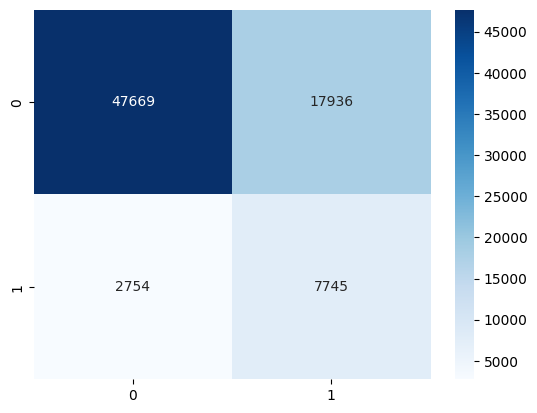

Train Accuracy:  0.728409244492499
Test Accuracy:  0.7285688005886681
F1 Score: 0.4309836652618242
Confusion Matrix: 
 [[47624 17981]
 [ 2676  7823]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     65605
           1       0.30      0.75      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.62      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104



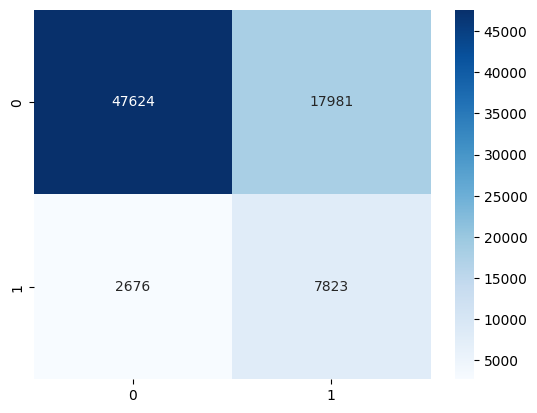

Train Accuracy:  0.728758390773528
Test Accuracy:  0.7285031010196573
F1 Score: 0.43086161304539444
Confusion Matrix: 
 [[47621 17984]
 [ 2678  7821]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     65605
           1       0.30      0.74      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.62      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104



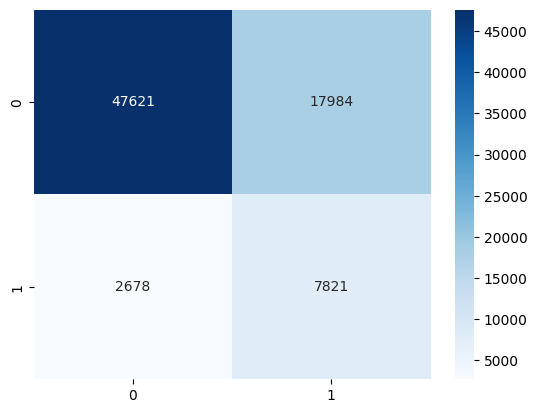

Train Accuracy:  0.728893544172636
Test Accuracy:  0.7285425207610638
F1 Score: 0.4307717741713279
Confusion Matrix: 
 [[47628 17977]
 [ 2682  7817]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     65605
           1       0.30      0.74      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.62      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104



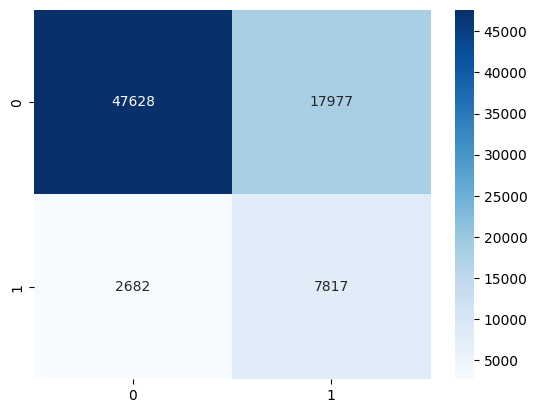

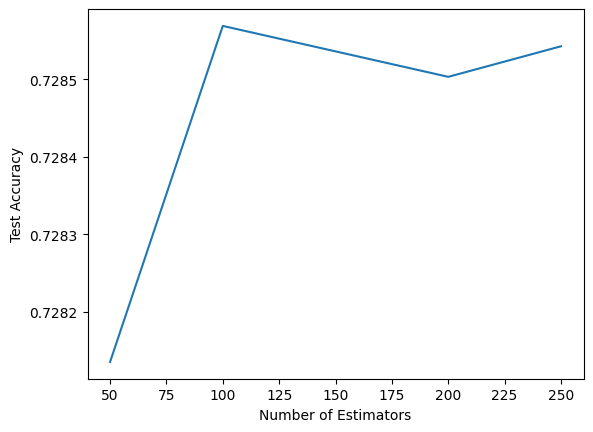

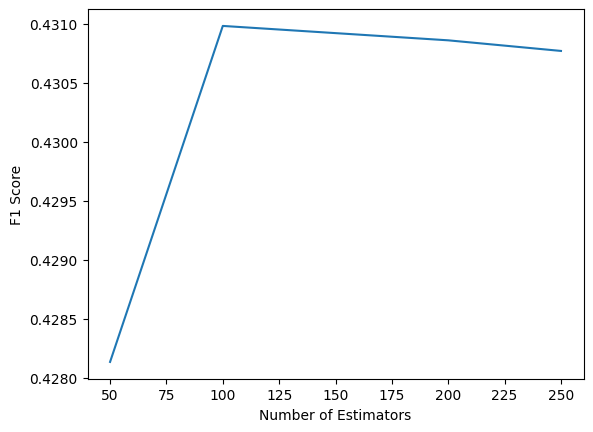

In [15]:
n_estimators = [50, 100, 200, 250]

estimator = LogisticRegression(class_weight='balanced', C=0.4, penalty='l2', solver='lbfgs', max_iter=40000)
test_accuracies = []
f1_scores = []

for n_estimator in n_estimators:
    adaboost_lr = AdaBoostClassifier(base_estimator=estimator, n_estimators=n_estimator, random_state=42)

    # fit the model
    adaboost_lr.fit(x_train, y_train)

    y_predicted_train = adaboost_lr.predict(x_train)
    y_predicted_test = adaboost_lr.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_predicted_train)
    test_accuracy = accuracy_score(y_test, y_predicted_test)
    f1 = f1_score(y_test, y_predicted_test)
    conf_matrix = confusion_matrix(y_test, y_predicted_test)
    class_report = classification_report(y_test, y_predicted_test)

    test_accuracies.append(test_accuracy)
    f1_scores.append(f1)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()


# plot the test accuracies for each number of estimators
plt.plot(n_estimators, test_accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.show()


# plot the test accuracies for each number of estimators
plt.plot(n_estimators, f1_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.show()


### AdaBoost With Logistic Regression on Resampled Dataset

Train Accuracy:  0.7256262534064848
Test Accuracy:  0.7297654216380027
F1 Score: 0.7310465337132005
Confusion Matrix: 
 [[47488 18106]
 [17295 48112]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73     65594
           1       0.73      0.74      0.73     65407

    accuracy                           0.73    131001
   macro avg       0.73      0.73      0.73    131001
weighted avg       0.73      0.73      0.73    131001



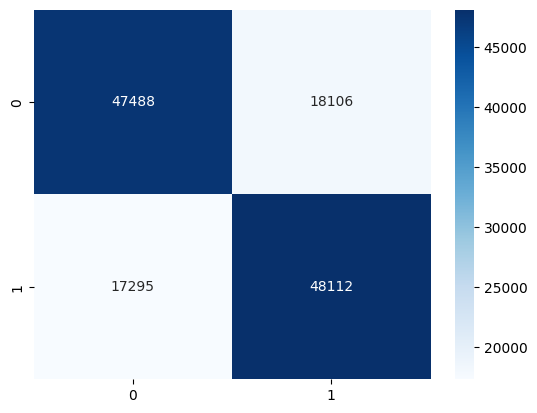

Train Accuracy:  0.7293983321719387
Test Accuracy:  0.7330096716818956
F1 Score: 0.7351386553985491
Confusion Matrix: 
 [[47486 18108]
 [16868 48539]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     65594
           1       0.73      0.74      0.74     65407

    accuracy                           0.73    131001
   macro avg       0.73      0.73      0.73    131001
weighted avg       0.73      0.73      0.73    131001



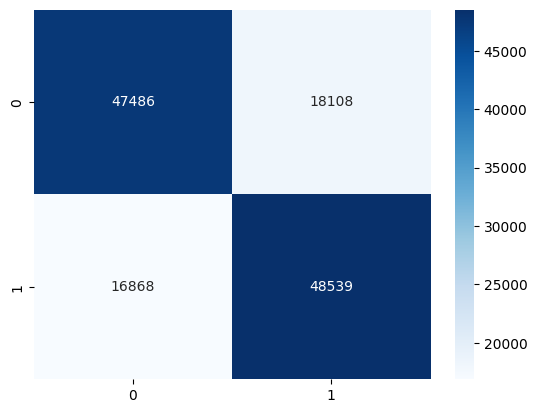

Train Accuracy:  0.7320319170862409
Test Accuracy:  0.7354295005381638
F1 Score: 0.7375769460828482
Confusion Matrix: 
 [[47635 17959]
 [16700 48707]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73     65594
           1       0.73      0.74      0.74     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



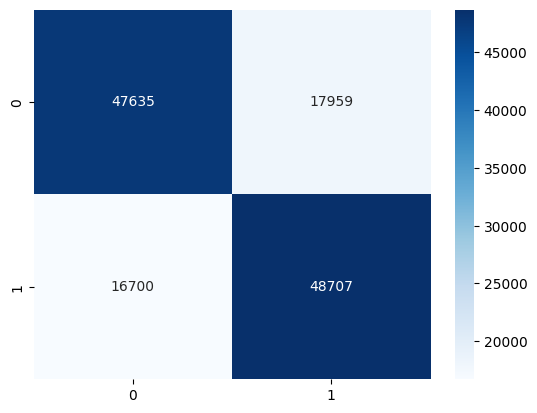

Train Accuracy:  0.7327222107718531
Test Accuracy:  0.7359409470156716
F1 Score: 0.7381338097473088
Confusion Matrix: 
 [[47656 17938]
 [16654 48753]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73     65594
           1       0.73      0.75      0.74     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



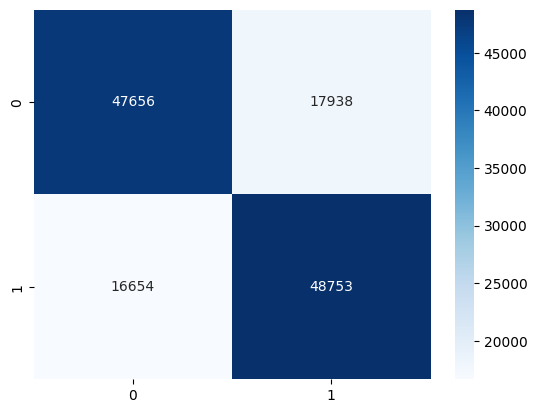

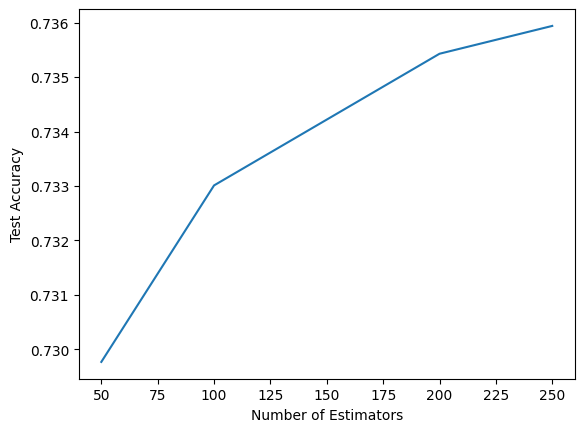

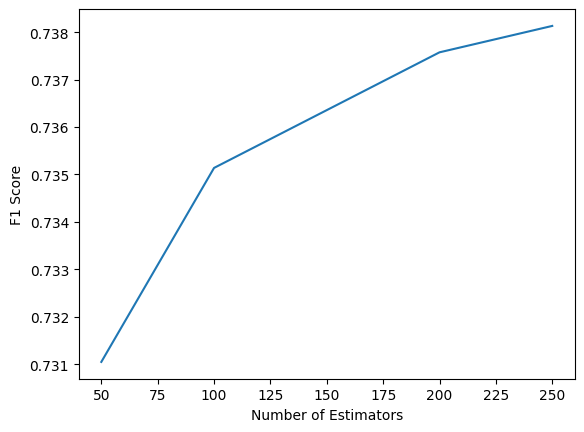

In [16]:
n_estimators = [50, 100, 200, 250]

estimator = LogisticRegression(class_weight='balanced', C=0.4, penalty='l2', solver='lbfgs', max_iter=40000)
test_accuracies = []
f1_scores = []

for n_estimator in n_estimators:
    adaboost_lr = AdaBoostClassifier(base_estimator=estimator, n_estimators=n_estimator, random_state=42)

    # fit the model
    adaboost_lr.fit(x_train_resampled, y_train_resampled)

    y_predicted_train = adaboost_lr.predict(x_train_resampled)
    y_predicted_test = adaboost_lr.predict(x_test_resampled)

    train_accuracy = accuracy_score(y_train_resampled, y_predicted_train)
    test_accuracy = accuracy_score(y_test_resampled, y_predicted_test)
    f1 = f1_score(y_test_resampled, y_predicted_test)
    conf_matrix = confusion_matrix(y_test_resampled, y_predicted_test)
    class_report = classification_report(y_test_resampled, y_predicted_test)

    test_accuracies.append(test_accuracy)
    f1_scores.append(f1)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()


# plot the test accuracies for each number of estimators
plt.plot(n_estimators, test_accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.show()


# plot the test accuracies for each number of estimators
plt.plot(n_estimators, f1_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.show()